In [1]:
#Load the Python Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import statistics
import scipy

In [2]:
df=pd.read_csv('general_data.csv')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [3]:
df.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8
4409,40,No,Travel_Rarely,Research & Development,28,3,Medical,1,4410,Male,...,0.0,Y,12,8,0,NaN,6,21,3,9


In [4]:
df.shape

(4410, 24)

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [7]:
df.fillna(method='ffill',inplace=True)

In [8]:
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [9]:
#Convert Categorical to numerical for Attrition Column
df_cat=pd.get_dummies(df[['Attrition']])
df_cat

,Attrition_No,Attrition_Yes
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
4405,1,0
4406,1,0
4407,1,0
4408,1,0


In [10]:
#Convert the Attrition categorical column to numerical using pd.get_dummies()
dfnew=pd.concat([df,pd.get_dummies(df['Attrition'],prefix='Attrition')],axis=1)
dfnew

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,11,8,0,1.0,6,1,0,0,1,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,23,8,1,6.0,3,5,1,4,0,1
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,15,8,3,5.0,2,5,0,3,1,0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,11,8,3,13.0,5,8,7,5,1,0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,12,8,2,9.0,2,6,0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,17,8,1,10.0,5,3,0,2,1,0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,15,8,0,10.0,2,3,0,2,1,0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,20,8,0,5.0,4,4,1,2,1,0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,14,8,1,10.0,2,9,7,8,1,0


In [11]:
#dfnew.drop(['Attrition'],axis=1,inplace=True)-This is to drop the original attrition column

In [12]:
dfnew

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,11,8,0,1.0,6,1,0,0,1,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,23,8,1,6.0,3,5,1,4,0,1
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,15,8,3,5.0,2,5,0,3,1,0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,11,8,3,13.0,5,8,7,5,1,0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,12,8,2,9.0,2,6,0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,17,8,1,10.0,5,3,0,2,1,0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,15,8,0,10.0,2,3,0,2,1,0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,20,8,0,5.0,4,4,1,2,1,0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,14,8,1,10.0,2,9,7,8,1,0


In [13]:
dfnew.corr()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes
Age,1.000000,0.006963,-0.035706,NaN,0.008649,-0.002884,-0.044314,0.296805,-0.033137,NaN,-0.031753,0.678857,-0.027308,0.311309,0.216513,0.202089,0.159205,-0.159205
DistanceFromHome,0.006963,1.000000,-0.008638,NaN,-0.001097,-0.037329,-0.021607,-0.013006,0.038125,NaN,0.011169,0.007762,-0.009001,0.031684,0.002290,0.021584,0.009730,-0.009730
Education,-0.035706,-0.008638,1.000000,NaN,-0.009680,0.045746,0.006410,-0.016912,-0.040531,NaN,0.001261,-0.009485,0.010472,0.006080,0.022490,0.005358,0.015111,-0.015111
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,0.008649,-0.001097,-0.009680,NaN,1.000000,-0.003303,0.007338,-0.002902,-0.004456,NaN,-0.014254,-0.000577,-0.010191,0.004086,0.000256,0.008579,0.004729,-0.004729
JobLevel,-0.002884,-0.037329,0.045746,NaN,-0.003303,1.000000,0.047316,-0.011028,0.010973,NaN,0.000993,-0.037831,-0.032500,-0.064219,-0.060811,-0.055251,0.010290,-0.010290
MonthlyIncome,-0.044314,-0.021607,0.006410,NaN,0.007338,0.047316,1.000000,-0.020922,0.004325,NaN,0.026930,-0.034005,0.050112,0.000995,0.065219,0.024304,0.031176,-0.031176
NumCompaniesWorked,0.296805,-0.013006,-0.016912,NaN,-0.002902,-0.011028,-0.020922,1.000000,0.030717,NaN,0.017484,0.235617,-0.032565,-0.117199,-0.035774,-0.108004,-0.041736,0.041736
PercentSalaryHike,-0.033137,0.038125,-0.040531,NaN,-0.004456,0.010973,0.004325,0.030717,1.000000,NaN,0.012548,-0.018432,-0.037392,-0.029707,-0.029542,-0.040864,-0.032533,0.032533
StandardHours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#COrrleation between Attrition and Age
from scipy.stats import pearsonr
stats,p=pearsonr(dfnew.Attrition_Yes,df.Age)
stats,p

(-0.15920500686577999, 1.9968016158862896e-26)

In [15]:
#COrrelation between Attrition and MonthlyIncome
from scipy.stats import pearsonr
stats,p=pearsonr(dfnew.Attrition_Yes,df.MonthlyIncome)
stats,p

(-0.031176281698115097, 0.03842748490600999)

In [16]:
#Correlation between Attrition and DistanceFrom Home
from scipy.stats import pearsonr
stats,p=pearsonr(dfnew.Attrition_Yes,df.DistanceFromHome)
stats,p

(-0.009730141010179709, 0.5182860428050771)

In [17]:
#Correlation between Attrition and Education
from scipy.stats import pearsonr
stats,p=pearsonr(dfnew.Attrition_Yes,df.Education)
stats,p

(-0.015111167710968869, 0.3157293177117888)

In [18]:
#Correlation between Attrition and JobLevel
from scipy.stats import pearsonr
stats,p=pearsonr(dfnew.Attrition_Yes,df.JobLevel)
stats,p

(-0.010289713287495022, 0.49451717271828405)

In [19]:
#Correlation between Attrition and NumberofCompaniesWorked
from scipy.stats import pearsonr
stats,p=pearsonr(dfnew.Attrition_Yes,df.NumCompaniesWorked)
stats,p

(0.04173639112117256, 0.005570528315118065)

In [20]:
#Corrleation between Attrition and PercentSalaryHike
from scipy.stats import pearsonr
stats,p=pearsonr(dfnew.Attrition_Yes,df.PercentSalaryHike)
stats,p

(0.03253259489105351, 0.030743386433355353)

In [21]:
#Corrleation between Attrition and TotalWOrkingYears
from scipy.stats import pearsonr
stats,p=pearsonr(dfnew.Attrition_Yes,df.TotalWorkingYears)
stats,p

(-0.16962158243861838, 8.007080895367898e-30)

In [22]:
#Corrleation between Attrition and TrainingTimesLastYear
from scipy.stats import pearsonr
stats,p=pearsonr(dfnew.Attrition_Yes,df.TrainingTimesLastYear)
stats,p

(-0.049430576244255106, 0.0010247061915362814)

In [23]:
#Correlation between Attrition and YearsatCompany
from scipy.stats import pearsonr
stats,p=pearsonr(dfnew.Attrition_Yes,df.YearsAtCompany)
stats,p

(-0.13439221398997772, 3.163883122487726e-19)

In [24]:
#Correlation Between Attrition and YearsSinceLastPromotion
from scipy.stats import pearsonr
stats,p=pearsonr(dfnew.Attrition_Yes,df.YearsSinceLastPromotion)
stats,p

(-0.033018775142584465, 0.028330336189402967)

In [25]:
#Corrleation Between Attrition and YearsWithCurrManager
from scipy.stats import pearsonr
stats,p=pearsonr(dfnew.Attrition_Yes,df.YearsWithCurrManager)
stats,p

(-0.15619931590162695, 1.7339322652923996e-25)

In [29]:
pearsoncorr = dfnew.corr(method='pearson')
pearsoncorr

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes
Age,1.000000,0.006963,-0.035706,NaN,0.008649,-0.002884,-0.044314,0.296805,-0.033137,NaN,-0.031753,0.678857,-0.027308,0.311309,0.216513,0.202089,0.159205,-0.159205
DistanceFromHome,0.006963,1.000000,-0.008638,NaN,-0.001097,-0.037329,-0.021607,-0.013006,0.038125,NaN,0.011169,0.007762,-0.009001,0.031684,0.002290,0.021584,0.009730,-0.009730
Education,-0.035706,-0.008638,1.000000,NaN,-0.009680,0.045746,0.006410,-0.016912,-0.040531,NaN,0.001261,-0.009485,0.010472,0.006080,0.022490,0.005358,0.015111,-0.015111
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,0.008649,-0.001097,-0.009680,NaN,1.000000,-0.003303,0.007338,-0.002902,-0.004456,NaN,-0.014254,-0.000577,-0.010191,0.004086,0.000256,0.008579,0.004729,-0.004729
JobLevel,-0.002884,-0.037329,0.045746,NaN,-0.003303,1.000000,0.047316,-0.011028,0.010973,NaN,0.000993,-0.037831,-0.032500,-0.064219,-0.060811,-0.055251,0.010290,-0.010290
MonthlyIncome,-0.044314,-0.021607,0.006410,NaN,0.007338,0.047316,1.000000,-0.020922,0.004325,NaN,0.026930,-0.034005,0.050112,0.000995,0.065219,0.024304,0.031176,-0.031176
NumCompaniesWorked,0.296805,-0.013006,-0.016912,NaN,-0.002902,-0.011028,-0.020922,1.000000,0.030717,NaN,0.017484,0.235617,-0.032565,-0.117199,-0.035774,-0.108004,-0.041736,0.041736
PercentSalaryHike,-0.033137,0.038125,-0.040531,NaN,-0.004456,0.010973,0.004325,0.030717,1.000000,NaN,0.012548,-0.018432,-0.037392,-0.029707,-0.029542,-0.040864,-0.032533,0.032533
StandardHours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


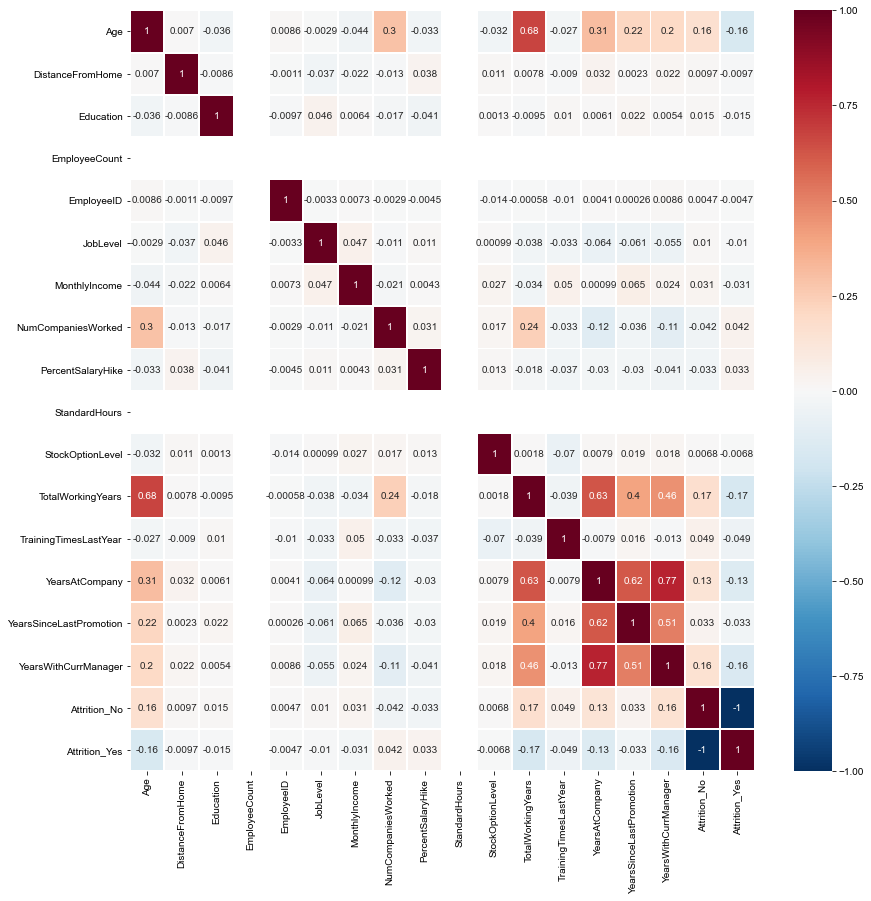

In [36]:
#Visualise the Corrleation
plt.figure(figsize=(14,14))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=1.0)
sns.set(font_scale=3)